# 🐍.4 Intro to Regression in Pandas

### Nate & Tyler


<img src="https://www.explainxkcd.com/wiki/images/9/91/linear_regression.png" width="400px"/>
<br>
Why Regression?
Regression is going to be our first foray into machine learning, or statstics, or econometrics depending on your point of view. This lesson will approach the theory and motivations behind simple linear regression.

*So what is regression?* <br>
>A statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

>One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
 The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
 
With regression, we can distill the relationship between two variables into a single parameter or set of parameters. This can be useful for:
- Inference: can we quantitatively show a relationship between the two variables? How strong is this relationship?
- Prediction: can we anticipate the values of our dependent variable based on the values of our independent variable(s)

In [1]:
# Let's import some of the modules we'll need
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sys.path.append('../../custom')

from db_utils import get_connection, validate_connection, get_data
pd.options.display.float_format = '{:,.2f}'.format

### Motivating Question?
Let's pretend we're admissions counselors and we'd like to admit college student that are going to be successful. How might we determine that? 
> Let's assume we can use SAT scores to predict college GPA potential.

Our Hypothesis is that students with higher SAT scores will perform better in college and have higher GPAs. Let's test this by graphing it!

In [2]:
data = pd.read_csv('sat_data.csv')
data['Total_SAT'] = data['math_SAT'] + data['verb_SAT']
data.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA,Total_SAT
0,3.45,643,589,3.76,3.52,1232
1,2.78,558,512,2.87,2.91,1070
2,2.52,583,503,2.54,2.40,1086
3,3.67,685,602,3.83,3.47,1287
4,3.24,592,538,3.29,3.47,1130


Text(0, 0.5, 'University GPA')

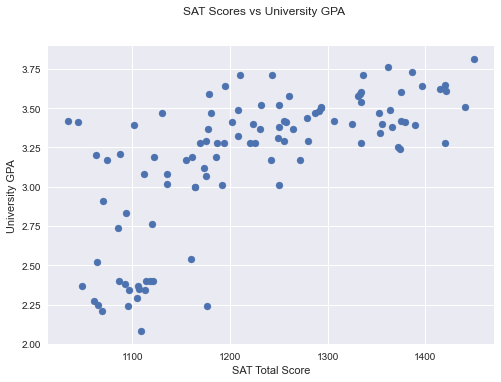

In [3]:
fig = plt.figure()
plt.scatter(data.Total_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')

We can see from the above graph that there is a general trend. It appears that people with higher SAT scores generally get better GPAs in college.

But now we want to quantify this in a relational format. By increasing SAT score by x-points, how much might this be expected to increase university GPA?

### Enter : Our formula for a linear equation!
Most of you might recall from algebra, our equation for a linear equation expressed below. <br><br>
\begin{equation}
y = m x + b
\end{equation}
<br>
We'll want to express that here where Y is our dependent variable (University GPA), x is our independent variable (SAT total Score), and m is a scalar value that we'll use to define the relationship between the two of them.

Here we have specified the *data generating process*. Implicitly, we have a hypothesis that the *actual* college GPAs follow this formula, whether that reflects a causal relationship or not. Is this realistic? No! But this is the assumption that we are making with a simple linear model. It's a useful way to distill real world concepts into math, but it comes with many caveats.

<img src="https://i.imgur.com/hZdj1XI.png" width="600"><img src="" width="600">

To build a `Linear Regression` using these variables we'll want to draw a line through our data such that we have an
initial intercept (b) and the slope of our line relates our observed values of X and Y.

To do this we're going to refactor our above equation a little bit and write it in a clearer format for understanding how they are related, such that Y is a function of random variable X. 
<br><br>
\begin{equation}
Y_i = f(X) = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}
<br><br>
In this equation our intercept is equal to $\beta_{0}$, $\beta_{1}$ is our scalar value (same as m in equation above) and $\epsilon$ is going to model our error, or residuals.


> Can anyone tell us why we have subscripts for $\beta$ and $X$?

So what does epsilon mean? Remember we're planning on drawing a line of best fit through our data. For each $x$ value, $\epsilon$ is going to represent the error of our fit (the distance from the actual observed value to our predicted line).

For a well specified model, $\epsilon$ is theoretically *totally random*, and does not depend on any factors. Again, is this realistic? Probably not.

<img src="https://files.realpython.com/media/fig-lin-reg.a506035b654a.png" width="600">

# Let's build a Regression Model

We've articulated our data generating process as a simple equation. Our parameters are $\beta_{0}$ and $\beta_{1}$. But how do we determine what values these parameters take on?

We want to find the *best* version of the paramters. But what does "best" mean here?

### Let's start with a hand-calculated example

Looking at the graph above let's come up with some estimates for a slope and intercept to input into our formula.
I'm going to regraph our formula here so we can better see the full axis.

*Pause for discussion*

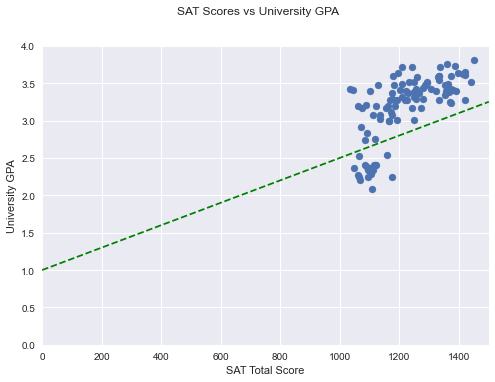

In [4]:
def get_predicted_value(beta_0: float, beta_1: float, x: float) -> float:
    """
    calculates the predicted value based on:
    - ``x``: independent variable
    - ``beta_0``: intercept parameter
    - ``beta_1``: slope parameter
    """
    return beta_0 + beta_1 * x

def fit_line(X: np.array, beta_0: float, beta_1: float) -> pd.Series:
    """
    Returns a series of predicted Y values for X and beta_0 and beta_1 values:
    - ``X``: independent variable as np.array
    - ``beta_0``: intercept parameter
    - ``beta_1``: slope parameter
    """
    return pd.Series(
        [get_predicted_value(beta_0, beta_1, x) for x in X],
        index=X)

fig = plt.figure()
plt.scatter(data.Total_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')
plt.xlim(0,1500)
plt.ylim(0,4)

## INPUT OUR PREDICTED VALUES BELOW
beta_0 = 1
beta_1 = 0.0015

fit_line(np.arange(0, 1600), beta_0, beta_1).plot(linestyle='dashed', color="green")

We can measure the "best" parameters based on how much the implied predictions (or fitted values) differ from the actual values ("goodness of fit"). We wouldn't use straight up error since this could be negative (different values would cancel each other out). It would be more approriate to use *absolute error* as our measurement. Even better would be *squared error*. This would both convert errors to absolute terms and put more weight on bigger errors. 

Finally, we want to aggregate goodness of fit across all of the different observations in our sample - easily accomplished by taking the mean.

What do we end up with?! ***Mean, Squared error***

This can also be described as a **loss function**, which describes the goodness of fit and determines which sets of parameters are better than others.

### Creating a Loss Function

Can we calculate the loss function described above for a given set of parameters?

In [23]:
def loss_function(dependent_values: np.array, independent_values: np.array,
                  beta_0: float, beta_1: float) -> float:
    '''
    Takes our Dependent and Independent values, and fit parameters beta_0 and beta_1
    to output the mean squared error of the predicted values.
    - ``dependent_values``: an array Y
    - ``independent_values``: an array X
    - ``beta_0``: intercept parameter
    - ``beta_1``: slope parameter
    '''
    epsilon = 0
    for y, x in zip(dependent_values, independent_values):
        yhat = get_predicted_value(beta_0, beta_1, x)
        epsilon += (y - yhat) ** 2
        
    return epsilon / dependent_values.size


# Let's test our loss function
MSE = loss_function(data.univ_GPA, data.Total_SAT, beta_0, beta_1)
print('Mean Squared Error: %s' %MSE)

Mean Squared Error: 0.2400324


Now that we have a measure of fit, let's try a few different values

Mean Squared Error: 1.064478336


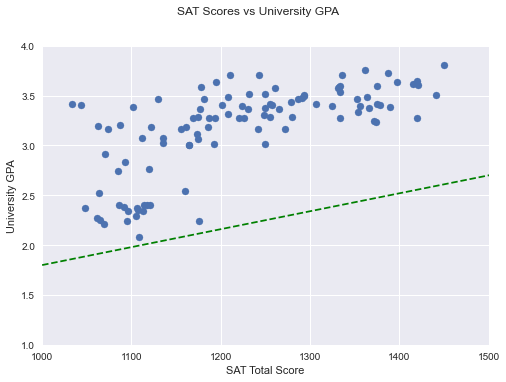

In [24]:
fig = plt.figure()
plt.scatter(data.Total_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')
plt.xlim(1000,1500)
plt.ylim(1,4)

## INPUT OUR PREDICTED VALUES BELOW
beta_0 = 0
beta_1 = 0.0018

fit_line(np.arange(1000, 1600), beta_0, beta_1).plot(linestyle='dashed', color="green", label="hand fit")
print('Mean Squared Error: %s' %loss_function(data.univ_GPA, data.Total_SAT, beta_0, beta_1))

> Can we describe what this might mean logically?

## Great, but now let's Optimize!
The `machine learning` portion of linear regression is solving for the best fit of this line, we do this by reducing the sum squared error, or the loss function as we've defined it, we need to fine the line where this SSE or epsilon in this case is the minimum possible value we can find. 

Rather than diving into the math behind this solve, we're going to introduce some easy tools you can use to resolve this yourself.

In [7]:
# Import the statsmodels module and associated information we'll need to perform this analysis
import statsmodels.api as sm

In [8]:
# Initialize a Linear Regression
X = data.Total_SAT        # retrieve a np.series of X values
X = sm.add_constant(X)    # add a space for constant value in our X fit
y = data.univ_GPA         # define our target Y variable

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               univ_GPA   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     90.89
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           8.05e-16
Time:                        19:06:16   Log-Likelihood:                -30.775
No. Observations:                 105   AIC:                             65.55
Df Residuals:                     103   BIC:                             70.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1716      0.352     -0.487      0.6

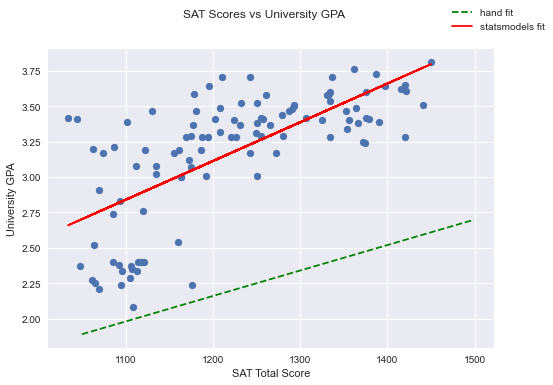

In [25]:
# Let's plot this against our current data to see how it looks
res = results.fittedvalues

fig = plt.figure()
plt.scatter(data.Total_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')
plt.plot(np.arange(1050,1500), fit_line(np.arange(1050, 1500), beta_0, beta_1), color='green', linestyle='dashed', label="hand fit")
plt.plot(data.Total_SAT, res, color='red', label="statsmodels fit")
fig.legend()

Lets see how our MSE compares between models
 

In [26]:
print('Hand-Fit MSE: %s' %loss_function(data.univ_GPA, data.Total_SAT, beta_0, beta_1))
print('Statsmodel-Fit MSE: %s' %results.mse_total)

Hand-Fit MSE: 1.064478336
Statsmodel-Fit MSE: 0.19998214285714286


Lastly let's open up some discussion to what some of these parameters mean!

In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               univ_GPA   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     90.89
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           8.05e-16
Time:                        19:21:45   Log-Likelihood:                -30.775
No. Observations:                 105   AIC:                             65.55
Df Residuals:                     103   BIC:                             70.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1716      0.352     -0.487      0.6